# 4. Example: Download era5 from cloud provider

DataAssimBench provides interfaces to ECWMF ERA5 data hosted on Google Cloud, Amazon Web Services, and Microsoft Azure.

In this example, we'll walk through loading data from Amazon Web Services (AWS) into a dabench data object.

### Part I: Imports and Model Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from dabench import data

In [2]:
# We can find info the options for the AWS data loader by running help()
help(data.AWS)

Help on class AWS in module dabench.data.aws:

class AWS(dabench.data._data.Data)
 |  AWS(variables=['air_temperature_at_2_metres'], months=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], years=[2020], min_lat=19.8554808619, max_lat=23.1886107447, min_lon=-84.9749110583, max_lon=-74.1780248685, system_dim=None, time_dim=None, store_as_jax=False, **kwargs)
 |  
 |  Class for loading ERA5 data from AWS Open Data
 |  
 |  Notes:
 |      Source: https://registry.opendata.aws/ecmwf-era5/
 |      Data is HRES sub-daily.
 |  
 |  Attributes:
 |      system_dim (int): System dimension
 |      time_dim (int): Total time steps
 |      variables (list of strings): Names of ERA5 variables to load.
 |          For list of variables, see:
 |          https://github.com/planet-os/notebooks/blob/master/aws/era5-pds.md
 |          NOTE: Do NOT include .nc extension in variable name.
 |          Default is ['air_temperature_at_2_metres']
 |      months (list of strings): List o

To start, let's download air temp data over the state of Colorado for 2020 and 2021.

Note: If you don't specify any of these options, the model object will use defaults, which are air temp at 2 metres for 2020 over Cuba. While you can download global data via this interface, it is not recommended (except for over very short time periods) due to the data volume.

In [3]:
# The model object is defined in the same way as the model data generators (e.g. Lorenz63).
# But the options vary a bit. In this case we can specify which variables and years to load
# and set a bounding box
aws_loader = data.AWS(variables = ['air_temperature_at_2_metres'], 
                       years = [2020, 2021],
                       min_lat = 36.992426, max_lat = 41.003444, 
                       min_lon = -109.060253, max_lon = -102.041524
                      )

In [4]:
# To download the data, we can use aws_loader.generate() 
# OR aws_loader.load()
aws_loader.load()
# Also works, but .generate() shows a warning because it 
# is a simple alias for .load()
# aws_loader.generate()

### Part II: Examining and Visualizing Data

The process for accessing and visualizing the data is much the same as it is for the other data objects (e.g. models)

In [5]:
# In this case, we have 17544 timesteps (24 hours for 731 days, 2020 was a leap year)
print(aws_loader.values.shape)
print(aws_loader.values)

(17544, 476)
[[260.75   258.5625 258.125  ... 275.6875 275.9375 276.0625]
 [260.5    258.5    258.0625 ... 274.375  274.8125 275.25  ]
 [260.875  259.75   259.3125 ... 273.0625 273.4375 273.8125]
 ...
 [266.     266.     266.5625 ... 286.     286.375  286.8125]
 [264.375  264.4375 265.0625 ... 284.0625 284.6875 285.25  ]
 [264.25   264.4375 264.625  ... 282.625  283.     283.4375]]


In [6]:
# We can access those timesteps directly:
print(aws_loader.times)

['2020-01-01T00:00:00.000000000' '2020-01-01T01:00:00.000000000'
 '2020-01-01T02:00:00.000000000' ... '2021-12-31T21:00:00.000000000'
 '2021-12-31T22:00:00.000000000' '2021-12-31T23:00:00.000000000']


In [7]:
# Convert each timestep back to 2D
print(aws_loader.values_gridded.shape)

(17544, 17, 28)


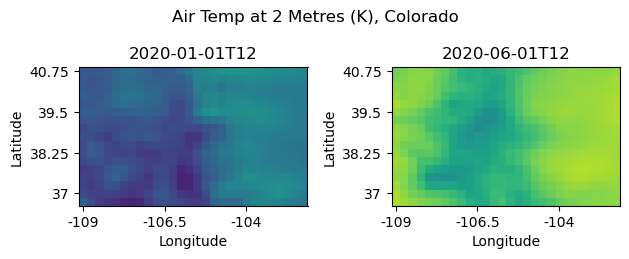

In [8]:
# Now let's compare air temp in January vs June over Colorado
fig, ax = plt.subplots(1, 2)
fig.suptitle('Air Temp at 2 Metres (K), Colorado')
ax[0].imshow(aws_loader.values_gridded[12], vmin=250, vmax=300)
ax[0].set_title(np.datetime_as_string(aws_loader.times[12], unit='h')); ax[0].set_xlabel('Longitude'); ax[0].set_ylabel('Latitude')
ax[0].set_yticks(ticks=[0, 5, 10, 15], labels=[40.75, 39.5, 38.25, 37]); ax[0].set_xticks(ticks=[0, 10, 20], labels=[-109, -106.5, -104])
ax[1].imshow(aws_loader.values_gridded[3660], vmin=250, vmax=300)
ax[1].set_title(np.datetime_as_string(aws_loader.times[3660], unit='h')); ax[1].set_xlabel('Longitude'); ax[1].set_ylabel('Latitude')
ax[1].set_yticks(ticks=[0, 5, 10, 15], labels=[40.75, 39.5, 38.25, 37]); ax[1].set_xticks(ticks=[0, 10, 20], labels=[-109, -106.5, -104])
fig.tight_layout()
fig.subplots_adjust(top=1.4)
plt.show()

### Part III: Customizing data download options

This interface is highly flexible. ERA5 offers many different variables that can be used. Multiple variables can be loaded at the same time.

You can find the full list of variables here: https://github.com/planet-os/notebooks/blob/master/aws/era5-pds.md#variables

Note that you cannot load forecast variables (denoted by "fc" in the table) and analysis variables ("an") into the same data object. You can load one or more forecast variables OR one or more analysis variables, but not both.

Let's load air pressure and sea surface temperature data over Cuba (the default bounding box) for 1983. Note that you should not included the ".nc" extension in your variable list.

In [9]:
# Cuba is the default bounding box so we don't need to specify that
cuba_loader = data.AWS(variables = ['air_pressure_at_mean_sea_level', 'sea_surface_temperature'], 
                       years = [1979]
                      )
cuba_loader.load()

Let's look at the shape of our data

In this case, we have:
- timesteps = 8760 (24 hrs x 365 days)
- x dim = 13
- y dim = 43
- variables = 2

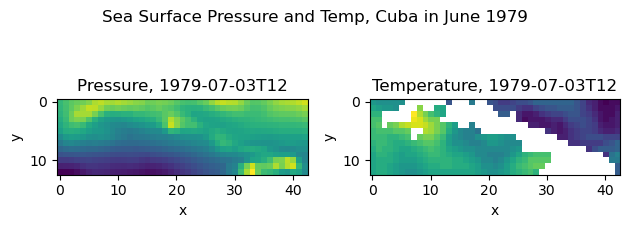

In [10]:
# Now let's plot sea surface temp and pressure next to each other in July
fig, ax = plt.subplots(1, 2)
fig.suptitle('Sea Surface Pressure and Temp, Cuba in June 1979')
ax[0].imshow(cuba_loader.values_gridded[4404, :, :, 0])
ax[0].set_title('Pressure, ' + np.datetime_as_string(cuba_loader.times[4404], unit='h')); ax[0].set_xlabel('x'); ax[0].set_ylabel('y')
ax[1].imshow(cuba_loader.values_gridded[4404, :, :, 1])
ax[1].set_title('Temperature, ' + np.datetime_as_string(cuba_loader.times[4404], unit='h')); ax[1].set_xlabel('x'); ax[1].set_ylabel('y')
fig.tight_layout()
fig.subplots_adjust(top=1.4)
plt.show()

A couple things to note:
1. Notice that pressures are lower and temps are higher to the Southwest vs. the Northeast
2. Sea surface tempearture is not defined over land